<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Packages-&amp;-Data" data-toc-modified-id="Import-Packages-&amp;-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Packages &amp; Data</a></span><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Filter-Data-for-Los-Angeles" data-toc-modified-id="Filter-Data-for-Los-Angeles-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Filter Data for Los Angeles</a></span></li></ul></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clean Data</a></span><ul class="toc-item"><li><span><a href="#Drop-Columns" data-toc-modified-id="Drop-Columns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Drop Columns</a></span></li><li><span><a href="#Reshape-from-Wide-to-Long-Format" data-toc-modified-id="Reshape-from-Wide-to-Long-Format-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Reshape from Wide to Long Format</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Step-5:-SARIMAX-Modeling" data-toc-modified-id="Step-5:-SARIMAX-Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 5: SARIMAX Modeling</a></span><ul class="toc-item"><li><span><a href="#Select-Best-Parameters" data-toc-modified-id="Select-Best-Parameters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Select Best Parameters</a></span></li><li><span><a href="#Calculate-RMSE-for-West-Hollywood" data-toc-modified-id="Calculate-RMSE-for-West-Hollywood-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Calculate RMSE for West Hollywood</a></span></li></ul></li><li><span><a href="#Calculate-5-&amp;-10-Year-ROI" data-toc-modified-id="Calculate-5-&amp;-10-Year-ROI-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calculate 5 &amp; 10 Year ROI</a></span><ul class="toc-item"><li><span><a href="#Sort-Top-10-Zip-Codes" data-toc-modified-id="Sort-Top-10-Zip-Codes-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Sort Top 10 Zip Codes</a></span></li></ul></li><li><span><a href="#Step-6:-Interpreting-Results" data-toc-modified-id="Step-6:-Interpreting-Results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 6: Interpreting Results</a></span></li></ul></div>

# Import Packages & Data

## Import Packages

In [121]:
# Filter warnings
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import matplotlib
%matplotlib inline

import itertools
import statsmodels.api as sm

## Import Data

In [2]:
# Import data
data = pd.read_csv('up_to_date_zillow_data.csv')
df = pd.DataFrame(data)

# Preview head
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1416272.0,1409421.0,1407017.0,1412042.0,1414135.0,1415095.0,1408966.0,1401018.0,1389676.0,1384859.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,358776.0,...,957541.0,956310.0,954994.0,954985.0,956480.0,958337.0,959091.0,958959.0,958378.0,959519.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1669612.0,1663472.0,1659302.0,1662263.0,1662774.0,1658055.0,1649411.0,1641047.0,1639442.0,1635311.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,200271.0,...,335925.0,335929.0,336035.0,335760.0,335937.0,336360.0,337373.0,338225.0,338713.0,338889.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,540023.0,...,1187731.0,1185049.0,1183037.0,1182915.0,1185225.0,1187244.0,1188570.0,1188375.0,1189551.0,1192253.0


## Filter Data for Los Angeles

In [126]:
# Filter for Los Angeles
df_LA = df[df['City'] == 'Los Angeles']

Sort by SizeRank to see the most populous regions. (This is my guess as it's definition was not provided by Zillow and through some online research, while mentioned a good amount of times, only one person had guessed that it may be an urbanization ranking.)

In [127]:
df_LA.sort_values(by='SizeRank', na_position='first').head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
43,96027,44,90046,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,177088.0,...,1843470.0,1853651.0,1868109.0,1880135.0,1900896.0,1918719.0,1936573.0,1948696.0,1963133.0,1982231.0
98,96015,99,90034,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,251418.0,...,1398417.0,1404092.0,1415063.0,1427241.0,1445321.0,1463208.0,1478076.0,1485024.0,1492268.0,1515853.0
114,96025,115,90044,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,126593.0,...,458596.0,461738.0,466106.0,470368.0,476367.0,482154.0,488178.0,492045.0,496175.0,502824.0
135,96007,136,90026,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,107147.0,...,985578.0,993267.0,1004494.0,1015062.0,1028334.0,1040727.0,1050599.0,1054837.0,1053531.0,1054874.0
172,96047,174,90066,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,237560.0,...,1489995.0,1493731.0,1501840.0,1513381.0,1534242.0,1552524.0,1569932.0,1579845.0,1593031.0,1624438.0


The top two in size rank are:

(1) 90046, which represents West Hollywood and the Hollywood Hills neighborhoods

(2) 90034, which includes the Palms, Westdale and La Cienega neighborhoods. 

West Hollywood and the Hollywood Hills are very affluent neighborhoods in the Greater Los Angeles area, with West Hollywood being the most densley populated. A just under 4,000 square foot penthouse apartment at the Edition on Sunset Blvd. in West Hollywood was listed on Zillow at $18.9M in 2020. 

There are also many apartment buildings and some densley packed bungalow style homes mixed with some more modern style homes.

Further into the Hollywood Hills homes become more spaced out and are larger single family homes. 

# Clean Data 

## Drop Columns

It looks like 'RegionName' is the zipcode and 'RegionID' is extra information that we don't need. So I will go ahead and drop that column.

In [129]:
# Columns to drop
to_drop = ['RegionID','RegionType','SizeRank','StateName']

# Drop
df_LA = df_LA.drop(to_drop, axis=1)

# Preview
df_LA.head(1)

,RegionName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
43,90046,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,177088.0,177788.0,177914.0,178037.0,178157.0,...,1843470.0,1853651.0,1868109.0,1880135.0,1900896.0,1918719.0,1936573.0,1948696.0,1963133.0,1982231.0


## Reshape from Wide to Long Format

Let's go ahead and melt the data from wide to long format so we can get it into time series format for modeling. 

In [137]:
# Define function to melt data
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

# Melt data
df_LA_melt = melt_data(df_LA)

# Sort by region name, then time to separate zip codes
df_LA_melt_sort = df_LA_melt.sort_values(by=['RegionName','time'])

# Set index frequency format to month
df_LA_melt_sort.asfreq('m').index

DatetimeIndex([], dtype='datetime64[ns]', freq='M')

Let's see how many zip codes and data points we have here.

In [142]:
# See how many zip codes we have in the data
print(f"n-zipcodes: {df_LA_melt_sort['RegionName'].nunique()}")

# See how many data points we have 
print(f'n-datapoints: {len(df_LA_melt_sort)}')

n-zipcodes: 100
n-datapoints: 28727


There are 100 different zipcodes in our dataset for Los Angeles. And for those 100 zipcodes we have 28,727 data points. That's a good amount, giving an average of about 287 data points per zip code. Newer zip codes may have fewer datapoints. 

# EDA

Let's take a look at the time series values for all 100 zip codes. These will most likely be dense on the plot, but we will be able to see any overall trends.

A note is that the data for this time series are already smoothed by Zillow. 

We'll create a function first so we can replicate this later when we've narrowed down our top zip codes for investing.

In [157]:
# Define function to plot time series for each zip code

def plot_zipcodes(df, legend=False):
    '''
    Creates a time series plot of home sale values by zip code.
    
    Input:
    df : Data frame of time series data.
    legend : If you want to add a legend. Default is False for the
    when number of zip codes in data set is high.
    
    Output:
    Returns a time series plot of home sale values by zip code.
    '''
    # Grab a list of the zip codes to iterate through
    zipcodes = df['RegionName'].unique()

    # Define figure
    plt.figure(figsize=(16,8))

    # Increase figure's font sizes
    matplotlib.rcParams.update({'font.size': 14})

    # Create empty list of labels
    labels = []

    # Iterate through zip codes and plot
    for zipcode in zipcodes:
        ts_zip = ts[ts['RegionName'] == zipcode]
        plt.plot(ts_zip['time'], ts_zip['value'], label=zipcode)
        labels.append(zipcode)

    # Title & x & y labels
    plt.title('Los Angeles Median Home Sale Prices Per Zip Code')
    plt.ylabel('Median Home Sale Prices (USD)', fontsize=16)
    plt.xlabel('Date', fontsize=16)
    
    if legend:
        plt.legend(loc="upper left")

    plt.show()

In [162]:
df_LA_melt_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28727 entries, 15564 to 29451
Data columns (total 7 columns):
RegionName    28727 non-null int64
City          28727 non-null object
State         28727 non-null object
Metro         28727 non-null object
CountyName    28727 non-null object
time          28727 non-null datetime64[ns]
value         28727 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 3.0+ MB


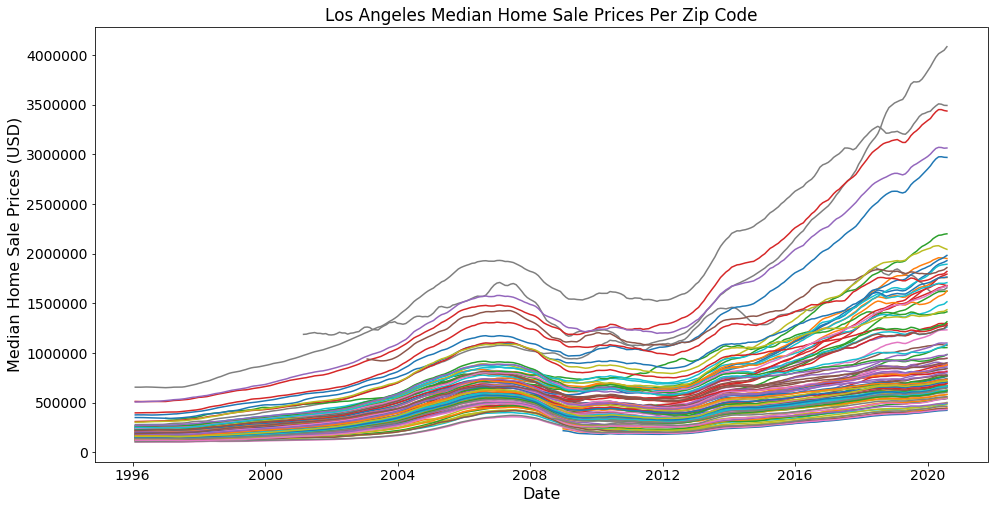

In [161]:
plot_zipcodes(df_LA_melt_sort)

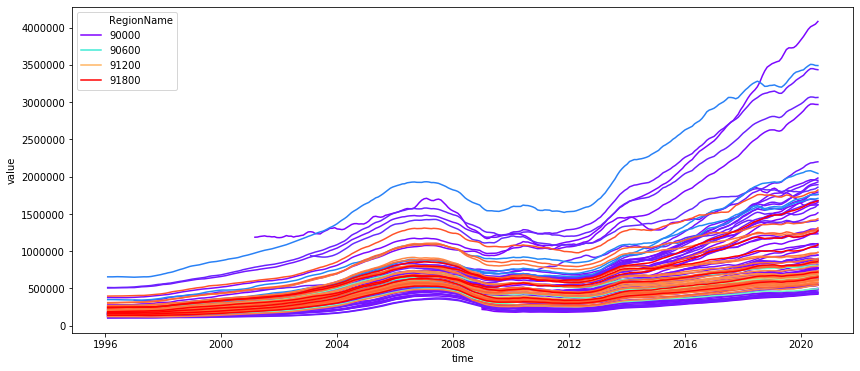

In [20]:
import seaborn as sns
plt.figure(figsize=(14,6))
sns.lineplot(x='time', y='value', data=df_LA_melt_sort, hue='RegionName', palette="rainbow");

**Zipcodes**

We can see a similar trend amongst all of our zipcodes. A few seem to be much higher than others, representing the more affluent neighborhoods. 

This data set represents median housing sale prices, so they could also include multifamily housing units as well, which would sell for a higher price than nearby single family homes. I imagine though overall the median would be representative and not skewed by this as density tends to be mixed (single family homes and multifamily homes), and sometimes in multifamily homes the individual apartments or condos are listed for sale individually. 

**Housing Bubble**

We can see the housing bubble of 2008 in the data here. Home sale values start increasing rapidly in 2004, then max out late 2006/early 2007 and begin to dip to a min in around 2009. Some zipcodes slowly drop even lower for the next couple of years. Prices slowly begin to recover, reaching max bubble values in about 2013, 6 years after the bubble burst. 

Since the market is volatile and bubbles are somewhat unpredictable and do occur, with another one being anticipated in 2020-2022, I am going to leave this data in the data set. 

# Step 5: SARIMAX Modeling

I conducted research and found that there is seasonality in home sales, so I am going to use SARIMA for our time series modeling, which integrates seasonality. 

**Seasonality**

According to the National Association of Realtors, the number of home sales increases significantly in the spring, with home sales increasing by 34% in February and March. 

Sales continue upward with the busiest home selling months being May through August, accounting for 40% of United States annual home sales volume. 

The slowest months are November through February, with January being the slowest. 

Prices of homes slightly increase during surge months when the demand in the market is higher. Therefore, selling homes during these peak times could prove to be advantageous for maximizing profits.

Reference: https://www.nar.realtor/blogs/economists-outlook/seasonality-in-the-housing-market

**Volatility**

A note about market volatility. Since the strategy we are focused on here is buy and hold, if and when there is a housing bubble, it is best to continue to hold during this time. While having a mortgage does create a liability, history shows that during a recession or related housing bubble, the rental market is not as affected as the housing market. 

I also recommend comparing our time series data and projections to the rental market data, which is also available on Zillow. 

Reference: https://www.forbes.com/sites/forbesrealestatecouncil/2020/01/02/how-will-a-recession-affect-my-rental-properties/#a4b70b45c70f

In [114]:
def zipcode_ts(df, zipcode):
    '''
    '''
    zipcode_ts = df[df['RegionName'] == zipcode]
    zipcode_ts.index = zipcode_ts['time']
    to_drop = ['RegionName','City','State','Metro','CountyName','time']
    zipcode_ts = zipcode_ts.drop(to_drop, axis=1)
    return zipcode_ts 

WeHo = zipcode_ts(df_LA_melt_sort, 90046)
CentCity = zipcode_ts(df_LA_melt_sort, 90067)

## Select Best Parameters 

Select best parameters for p, d & q according to the lowest BIC value.

In [75]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

Conduct gridsearch. This is coded out because it takes a long time to run. I ran it for West Hollywood as running for all 95 zip codes would take too long. I then chose the parameters with the lowest BIC and used those when I ran each of our 95 zip codes through our SARIMAX model. 

In [112]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best BIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(WeHo,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                            freq='M')

            output = mod.fit(maxiter=100) 
            ans.append([comb, combs, output.bic])
            print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
        except:
            continue

SARIMAX (0, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =8872.04900513266
SARIMAX (0, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =8344.589010661477
SARIMAX (0, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =7984.746234386041
SARIMAX (0, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =7327.721808432406
SARIMAX (0, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =7032.85501878065
SARIMAX (0, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =6552.701058477384
SARIMAX (0, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =6620.497021219602
SARIMAX (0, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =6342.153815679646
SARIMAX (0, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =6054.134769937056
SARIMAX (0, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated =6986.796145557303
SARIMAX (0, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =6926.532856763946
SARIMAX (0, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =6623.2125857853725
SARIMAX (0, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =6643.824828349578
SARIMAX (0, 0, 0) x (1, 1, 1, 12)12 : BIC Calculated =9421.459348

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 0, 1) x (0, 0, 1, 12)12 : BIC Calculated =8235.240605104289
SARIMAX (0, 0, 1) x (0, 0, 2, 12)12 : BIC Calculated =7876.788065825364
SARIMAX (0, 0, 1) x (0, 1, 0, 12)12 : BIC Calculated =7403.237994462634
SARIMAX (0, 0, 1) x (0, 1, 1, 12)12 : BIC Calculated =6774.709942167926
SARIMAX (0, 0, 1) x (0, 1, 2, 12)12 : BIC Calculated =8822.922639848133
SARIMAX (0, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =6389.512378430427
SARIMAX (0, 0, 1) x (0, 2, 1, 12)12 : BIC Calculated =7803.270553758564
SARIMAX (0, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =5733.994099806426
SARIMAX (0, 0, 1) x (1, 0, 0, 12)12 : BIC Calculated =8894.674341278547
SARIMAX (0, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =8739.148771715723
SARIMAX (0, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =8132.922417246165
SARIMAX (0, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =6799.948951909064
SARIMAX (0, 0, 1) x (1, 1, 1, 12)12 : BIC Calculated =6755.213449848434
SARIMAX (0, 0, 1) x (1, 1, 2, 12)12 : BIC Calculated =8256.62444

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =55405.3323041519
SARIMAX (0, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =7153.652912594254
SARIMAX (0, 0, 2) x (1, 1, 1, 12)12 : BIC Calculated =6729.681702483568
SARIMAX (0, 0, 2) x (1, 1, 2, 12)12 : BIC Calculated =7853.915538953098
SARIMAX (0, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =6081.204339253752
SARIMAX (0, 0, 2) x (1, 2, 1, 12)12 : BIC Calculated =7188.73645426781
SARIMAX (0, 0, 2) x (1, 2, 2, 12)12 : BIC Calculated =6801.939862591695
SARIMAX (0, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =7936.06040536949
SARIMAX (0, 0, 2) x (2, 0, 1, 12)12 : BIC Calculated =125078148785.90459
SARIMAX (0, 0, 2) x (2, 0, 2, 12)12 : BIC Calculated =48964.43485061783
SARIMAX (0, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =6502.384362565502
SARIMAX (0, 0, 2) x (2, 1, 1, 12)12 : BIC Calculated =8512.630865249677
SARIMAX (0, 0, 2) x (2, 1, 2, 12)12 : BIC Calculated =8702.848554225848
SARIMAX (0, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =5802.6358152

SARIMAX (0, 2, 0) x (1, 2, 2, 12)12 : BIC Calculated =4853.443088822448
SARIMAX (0, 2, 0) x (2, 0, 0, 12)12 : BIC Calculated =4970.314860884542
SARIMAX (0, 2, 0) x (2, 0, 1, 12)12 : BIC Calculated =4972.46776619246
SARIMAX (0, 2, 0) x (2, 0, 2, 12)12 : BIC Calculated =4963.895498025365
SARIMAX (0, 2, 0) x (2, 1, 0, 12)12 : BIC Calculated =4941.429303967043
SARIMAX (0, 2, 0) x (2, 1, 1, 12)12 : BIC Calculated =4939.287747567856


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 2, 0) x (2, 1, 2, 12)12 : BIC Calculated =4921.534582227953
SARIMAX (0, 2, 0) x (2, 2, 0, 12)12 : BIC Calculated =4916.725543635106
SARIMAX (0, 2, 0) x (2, 2, 1, 12)12 : BIC Calculated =4837.083503633337
SARIMAX (0, 2, 0) x (2, 2, 2, 12)12 : BIC Calculated =4808.555129148343
SARIMAX (0, 2, 1) x (0, 0, 0, 12)12 : BIC Calculated =5499.4137701898835
SARIMAX (0, 2, 1) x (0, 0, 1, 12)12 : BIC Calculated =5224.0702894533215
SARIMAX (0, 2, 1) x (0, 0, 2, 12)12 : BIC Calculated =4958.79804798092
SARIMAX (0, 2, 1) x (0, 1, 0, 12)12 : BIC Calculated =5583.249511339673
SARIMAX (0, 2, 1) x (0, 1, 1, 12)12 : BIC Calculated =5272.093964134965
SARIMAX (0, 2, 1) x (0, 1, 2, 12)12 : BIC Calculated =4927.382854081625
SARIMAX (0, 2, 1) x (0, 2, 0, 12)12 : BIC Calculated =5653.049306908438
SARIMAX (0, 2, 1) x (0, 2, 1, 12)12 : BIC Calculated =5200.195748187887


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =4803.731731378688
SARIMAX (0, 2, 1) x (1, 0, 0, 12)12 : BIC Calculated =5244.298868652495
SARIMAX (0, 2, 1) x (1, 0, 1, 12)12 : BIC Calculated =5209.069475634647
SARIMAX (0, 2, 1) x (1, 0, 2, 12)12 : BIC Calculated =4921.105017811783
SARIMAX (0, 2, 1) x (1, 1, 0, 12)12 : BIC Calculated =5241.532914747687
SARIMAX (0, 2, 1) x (1, 1, 1, 12)12 : BIC Calculated =5238.789018799576


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 2, 1) x (1, 1, 2, 12)12 : BIC Calculated =4776.045930956406
SARIMAX (0, 2, 1) x (1, 2, 0, 12)12 : BIC Calculated =5254.695514112641
SARIMAX (0, 2, 1) x (1, 2, 1, 12)12 : BIC Calculated =5228.74754448949
SARIMAX (0, 2, 1) x (1, 2, 2, 12)12 : BIC Calculated =4976.525375343813
SARIMAX (0, 2, 1) x (2, 0, 0, 12)12 : BIC Calculated =4974.392709954773
SARIMAX (0, 2, 1) x (2, 0, 1, 12)12 : BIC Calculated =5002.456831494228
SARIMAX (0, 2, 1) x (2, 0, 2, 12)12 : BIC Calculated =4970.046953486127
SARIMAX (0, 2, 1) x (2, 1, 0, 12)12 : BIC Calculated =4944.80538333963
SARIMAX (0, 2, 1) x (2, 1, 1, 12)12 : BIC Calculated =4942.619066073664


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 2, 1) x (2, 1, 2, 12)12 : BIC Calculated =4904.0610240717815
SARIMAX (0, 2, 1) x (2, 2, 0, 12)12 : BIC Calculated =4920.454984629594
SARIMAX (0, 2, 1) x (2, 2, 1, 12)12 : BIC Calculated =5016.309996545537
SARIMAX (0, 2, 1) x (2, 2, 2, 12)12 : BIC Calculated =4978.229095054159
SARIMAX (0, 2, 2) x (0, 0, 0, 12)12 : BIC Calculated =5485.9553809348445
SARIMAX (0, 2, 2) x (0, 0, 1, 12)12 : BIC Calculated =5212.569132608417
SARIMAX (0, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =4946.986877870214
SARIMAX (0, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =5567.615217337197
SARIMAX (0, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =5255.49970966383
SARIMAX (0, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =4914.392989364221
SARIMAX (0, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =5636.669235462906
SARIMAX (0, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =5254.808520699016
SARIMAX (0, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =5468.4797778482025
SARIMAX (0, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =5250.939

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 2, 2) x (1, 2, 1, 12)12 : BIC Calculated =5044.949201458286
SARIMAX (0, 2, 2) x (1, 2, 2, 12)12 : BIC Calculated =4962.981410143242
SARIMAX (0, 2, 2) x (2, 0, 0, 12)12 : BIC Calculated =4979.2964281840605
SARIMAX (0, 2, 2) x (2, 0, 1, 12)12 : BIC Calculated =4981.595917729559
SARIMAX (0, 2, 2) x (2, 0, 2, 12)12 : BIC Calculated =4958.231331868442
SARIMAX (0, 2, 2) x (2, 1, 0, 12)12 : BIC Calculated =4950.131766736654
SARIMAX (0, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =4948.08222290865


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (0, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =4891.242379363985
SARIMAX (0, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =5042.089229889824
SARIMAX (0, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =4826.300908655472
SARIMAX (0, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =4964.5807341144355
SARIMAX (1, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =5895.907653545938
SARIMAX (1, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =5790.942650854353
SARIMAX (1, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =5485.3207771401185
SARIMAX (1, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =5814.19282444085


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =5584.330098555317
SARIMAX (1, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =6312.2682363775375
SARIMAX (1, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =5866.222042310496


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =5623.413108388562


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =5227.613559071012
SARIMAX (1, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated =5666.864432878069
SARIMAX (1, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =5845.924089219863
SARIMAX (1, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =5510.01878395392
SARIMAX (1, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =5504.5648006067895


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 0) x (1, 1, 1, 12)12 : BIC Calculated =5500.090711715775
SARIMAX (1, 0, 0) x (1, 1, 2, 12)12 : BIC Calculated =5932.315785493845
SARIMAX (1, 0, 0) x (1, 2, 0, 12)12 : BIC Calculated =5483.751791126826
SARIMAX (1, 0, 0) x (1, 2, 1, 12)12 : BIC Calculated =6462.460693641949
SARIMAX (1, 0, 0) x (1, 2, 2, 12)12 : BIC Calculated =5825.531288363021
SARIMAX (1, 0, 0) x (2, 0, 0, 12)12 : BIC Calculated =5435.825102431551
SARIMAX (1, 0, 0) x (2, 0, 1, 12)12 : BIC Calculated =5564.251570206678
SARIMAX (1, 0, 0) x (2, 0, 2, 12)12 : BIC Calculated =5497.791626412188
SARIMAX (1, 0, 0) x (2, 1, 0, 12)12 : BIC Calculated =5265.56103257242
SARIMAX (1, 0, 0) x (2, 1, 1, 12)12 : BIC Calculated =6017.254968998253


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 0) x (2, 1, 2, 12)12 : BIC Calculated =5235.817865805853
SARIMAX (1, 0, 0) x (2, 2, 0, 12)12 : BIC Calculated =5207.980426094029
SARIMAX (1, 0, 0) x (2, 2, 1, 12)12 : BIC Calculated =5849.629202292461
SARIMAX (1, 0, 0) x (2, 2, 2, 12)12 : BIC Calculated =5204.763565643542
SARIMAX (1, 0, 1) x (0, 0, 0, 12)12 : BIC Calculated =5710.0747893029775
SARIMAX (1, 0, 1) x (0, 0, 1, 12)12 : BIC Calculated =5655.625532709171
SARIMAX (1, 0, 1) x (0, 0, 2, 12)12 : BIC Calculated =5372.0165167304685
SARIMAX (1, 0, 1) x (0, 1, 0, 12)12 : BIC Calculated =5698.396660400217
SARIMAX (1, 0, 1) x (0, 1, 1, 12)12 : BIC Calculated =7373.123710284914


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 1) x (0, 1, 2, 12)12 : BIC Calculated =5056.132336683628
SARIMAX (1, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =5734.259852738173
SARIMAX (1, 0, 1) x (0, 2, 1, 12)12 : BIC Calculated =6572.31695983031


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =5099.320944507209
SARIMAX (1, 0, 1) x (1, 0, 0, 12)12 : BIC Calculated =5509.179834435053
SARIMAX (1, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =5496.016020652196
SARIMAX (1, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =5353.971157295047
SARIMAX (1, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =5417.765389079453
SARIMAX (1, 0, 1) x (1, 1, 1, 12)12 : BIC Calculated =6106.088645903395
SARIMAX (1, 0, 1) x (1, 1, 2, 12)12 : BIC Calculated =5532.755259661069
SARIMAX (1, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =5402.9268591021355
SARIMAX (1, 0, 1) x (1, 2, 1, 12)12 : BIC Calculated =6009.3494581295945
SARIMAX (1, 0, 1) x (1, 2, 2, 12)12 : BIC Calculated =5567.694321601146
SARIMAX (1, 0, 1) x (2, 0, 0, 12)12 : BIC Calculated =5289.36400491656
SARIMAX (1, 0, 1) x (2, 0, 1, 12)12 : BIC Calculated =5502.243313723567
SARIMAX (1, 0, 1) x (2, 0, 2, 12)12 : BIC Calculated =5355.812114006774
SARIMAX (1, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =5143.6728

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 2) x (0, 1, 1, 12)12 : BIC Calculated =5220.777305426502


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 2) x (0, 1, 2, 12)12 : BIC Calculated =4814.540659251031
SARIMAX (1, 0, 2) x (0, 2, 0, 12)12 : BIC Calculated =5620.97424485883


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 2) x (0, 2, 1, 12)12 : BIC Calculated =5319.028155487857


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 2) x (0, 2, 2, 12)12 : BIC Calculated =5048.858442878729
SARIMAX (1, 0, 2) x (1, 0, 0, 12)12 : BIC Calculated =5343.5428844822745
SARIMAX (1, 0, 2) x (1, 0, 1, 12)12 : BIC Calculated =5493.140874293888
SARIMAX (1, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =5185.021201250173
SARIMAX (1, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =5323.993974672938
SARIMAX (1, 0, 2) x (1, 1, 1, 12)12 : BIC Calculated =5905.4113022296015
SARIMAX (1, 0, 2) x (1, 1, 2, 12)12 : BIC Calculated =5431.438723547657
SARIMAX (1, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =5352.768850469339
SARIMAX (1, 0, 2) x (1, 2, 1, 12)12 : BIC Calculated =5882.891489489809
SARIMAX (1, 0, 2) x (1, 2, 2, 12)12 : BIC Calculated =5441.157668784514
SARIMAX (1, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =5124.38900387493
SARIMAX (1, 0, 2) x (2, 0, 1, 12)12 : BIC Calculated =5308.587605860917


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 0, 2) x (2, 0, 2, 12)12 : BIC Calculated =5190.729821625132
SARIMAX (1, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =5018.631468972215
SARIMAX (1, 0, 2) x (2, 1, 1, 12)12 : BIC Calculated =5679.8052513856865
SARIMAX (1, 0, 2) x (2, 1, 2, 12)12 : BIC Calculated =4990.638399153711
SARIMAX (1, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =5035.851749869607
SARIMAX (1, 0, 2) x (2, 2, 1, 12)12 : BIC Calculated =5009.324915835025
SARIMAX (1, 0, 2) x (2, 2, 2, 12)12 : BIC Calculated =4973.55724757989
SARIMAX (1, 1, 0) x (0, 0, 0, 12)12 : BIC Calculated =5529.568906122806
SARIMAX (1, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =5252.142813926767
SARIMAX (1, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =4992.155254937449
SARIMAX (1, 1, 0) x (0, 1, 0, 12)12 : BIC Calculated =5581.961801438137
SARIMAX (1, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =5283.1922137622
SARIMAX (1, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =4994.605635118609
SARIMAX (1, 1, 0) x (0, 2, 0, 12)12 : BIC Calculated =5655.5133863

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 0) x (2, 1, 2, 12)12 : BIC Calculated =4922.4976299998425
SARIMAX (1, 2, 0) x (2, 2, 0, 12)12 : BIC Calculated =5011.75221757648
SARIMAX (1, 2, 0) x (2, 2, 1, 12)12 : BIC Calculated =4991.942341783141
SARIMAX (1, 2, 0) x (2, 2, 2, 12)12 : BIC Calculated =4993.73578963368
SARIMAX (1, 2, 1) x (0, 0, 0, 12)12 : BIC Calculated =5509.502376956163
SARIMAX (1, 2, 1) x (0, 0, 1, 12)12 : BIC Calculated =5251.207294299693
SARIMAX (1, 2, 1) x (0, 0, 2, 12)12 : BIC Calculated =4936.260171192774
SARIMAX (1, 2, 1) x (0, 1, 0, 12)12 : BIC Calculated =5562.213657815599
SARIMAX (1, 2, 1) x (0, 1, 1, 12)12 : BIC Calculated =5247.849531398059
SARIMAX (1, 2, 1) x (0, 1, 2, 12)12 : BIC Calculated =4919.37875381693
SARIMAX (1, 2, 1) x (0, 2, 0, 12)12 : BIC Calculated =5662.848952229572
SARIMAX (1, 2, 1) x (0, 2, 1, 12)12 : BIC Calculated =5201.5399859761255
SARIMAX (1, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =4967.693707022762
SARIMAX (1, 2, 1) x (1, 0, 0, 12)12 : BIC Calculated =5220.904342

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 1) x (2, 1, 2, 12)12 : BIC Calculated =4900.89431681642
SARIMAX (1, 2, 1) x (2, 2, 0, 12)12 : BIC Calculated =4998.2819422497605


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (1, 2, 1) x (2, 2, 1, 12)12 : BIC Calculated =4765.307156250976
SARIMAX (1, 2, 1) x (2, 2, 2, 12)12 : BIC Calculated =4961.25195068278
SARIMAX (1, 2, 2) x (0, 0, 0, 12)12 : BIC Calculated =5483.841559358909
SARIMAX (1, 2, 2) x (0, 0, 1, 12)12 : BIC Calculated =5162.558897794311
SARIMAX (1, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =4854.430873627449
SARIMAX (1, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =5539.7834879301145
SARIMAX (1, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =5245.061299571028
SARIMAX (1, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =4964.833727468715
SARIMAX (1, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =5611.576147595342
SARIMAX (1, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =5240.08737393856
SARIMAX (1, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =4970.818875792094
SARIMAX (1, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =5236.192044776863
SARIMAX (1, 2, 2) x (1, 0, 1, 12)12 : BIC Calculated =5151.262999665612
SARIMAX (1, 2, 2) x (1, 0, 2, 12)12 : BIC Calculated =4859.471912

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =5710.480621653758
SARIMAX (2, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =5443.353645487474
SARIMAX (2, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =5586.820644457209
SARIMAX (2, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =7031.296488436889
SARIMAX (2, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =5911.209890001083
SARIMAX (2, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =5634.536723465338
SARIMAX (2, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =6327.845537469175
SARIMAX (2, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =5728.041394069045
SARIMAX (2, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated =5238.024541399722
SARIMAX (2, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =5691.1992228719955
SARIMAX (2, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =5448.049662754497
SARIMAX (2, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =5248.42573917609
SARIMAX (2, 0, 0) x (1, 1, 1, 12)12 : BIC Calculated =5252.066830694992
SARIMAX (2, 0, 0) x (1, 1, 2, 12)12 : BIC Calculated =5020.42884

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 1) x (0, 1, 2, 12)12 : BIC Calculated =5009.81295817472
SARIMAX (2, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =5635.787396919643


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 1) x (0, 2, 1, 12)12 : BIC Calculated =5399.309586204372


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =5026.612148517329
SARIMAX (2, 0, 1) x (1, 0, 0, 12)12 : BIC Calculated =5243.29803413075
SARIMAX (2, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =5575.510757304462
SARIMAX (2, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =5299.459653974152
SARIMAX (2, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =5249.222821027014
SARIMAX (2, 0, 1) x (1, 1, 1, 12)12 : BIC Calculated =5252.836775176288
SARIMAX (2, 0, 1) x (1, 1, 2, 12)12 : BIC Calculated =5001.795954813348
SARIMAX (2, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =5262.819293281137
SARIMAX (2, 0, 1) x (1, 2, 1, 12)12 : BIC Calculated =5213.141993463016
SARIMAX (2, 0, 1) x (1, 2, 2, 12)12 : BIC Calculated =4970.530150748692
SARIMAX (2, 0, 1) x (2, 0, 0, 12)12 : BIC Calculated =5016.166991326496
SARIMAX (2, 0, 1) x (2, 0, 1, 12)12 : BIC Calculated =5359.978426163287


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 1) x (2, 0, 2, 12)12 : BIC Calculated =5329.552475807271
SARIMAX (2, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =4988.540395029791
SARIMAX (2, 0, 1) x (2, 1, 1, 12)12 : BIC Calculated =4992.267649680174
SARIMAX (2, 0, 1) x (2, 1, 2, 12)12 : BIC Calculated =5135.714405041583
SARIMAX (2, 0, 1) x (2, 2, 0, 12)12 : BIC Calculated =4987.183338120111
SARIMAX (2, 0, 1) x (2, 2, 1, 12)12 : BIC Calculated =4967.196129291356
SARIMAX (2, 0, 1) x (2, 2, 2, 12)12 : BIC Calculated =4972.659379719235


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2) x (0, 0, 0, 12)12 : BIC Calculated =5509.099033549129
SARIMAX (2, 0, 2) x (0, 0, 1, 12)12 : BIC Calculated =5203.902520516001
SARIMAX (2, 0, 2) x (0, 0, 2, 12)12 : BIC Calculated =5126.383965029157
SARIMAX (2, 0, 2) x (0, 1, 0, 12)12 : BIC Calculated =5559.733831633932
SARIMAX (2, 0, 2) x (0, 1, 1, 12)12 : BIC Calculated =6582.632685524085
SARIMAX (2, 0, 2) x (0, 1, 2, 12)12 : BIC Calculated =5768.581869914676
SARIMAX (2, 0, 2) x (0, 2, 0, 12)12 : BIC Calculated =5604.063525527135
SARIMAX (2, 0, 2) x (0, 2, 1, 12)12 : BIC Calculated =6149.816864118789
SARIMAX (2, 0, 2) x (0, 2, 2, 12)12 : BIC Calculated =5620.27034304846
SARIMAX (2, 0, 2) x (1, 0, 0, 12)12 : BIC Calculated =5248.746736380318
SARIMAX (2, 0, 2) x (1, 0, 1, 12)12 : BIC Calculated =5421.943277688429
SARIMAX (2, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =5110.105934263764
SARIMAX (2, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =5248.12675925368
SARIMAX (2, 0, 2) x (1, 1, 1, 12)12 : BIC Calculated =5232.5006855

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 0, 2) x (2, 0, 2, 12)12 : BIC Calculated =5121.497574314688
SARIMAX (2, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =4991.890177729343
SARIMAX (2, 0, 2) x (2, 1, 1, 12)12 : BIC Calculated =5073.519623772505
SARIMAX (2, 0, 2) x (2, 1, 2, 12)12 : BIC Calculated =5051.397480609743
SARIMAX (2, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =4987.707157537864
SARIMAX (2, 0, 2) x (2, 2, 1, 12)12 : BIC Calculated =4991.263444617717
SARIMAX (2, 0, 2) x (2, 2, 2, 12)12 : BIC Calculated =4955.571667715219
SARIMAX (2, 1, 0) x (0, 0, 0, 12)12 : BIC Calculated =5517.056049705853
SARIMAX (2, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =5256.287432207674
SARIMAX (2, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =4995.885533422231
SARIMAX (2, 1, 0) x (0, 1, 0, 12)12 : BIC Calculated =5553.31359512715
SARIMAX (2, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =5282.350178429902
SARIMAX (2, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =4993.803826081908
SARIMAX (2, 1, 0) x (0, 2, 0, 12)12 : BIC Calculated =5618.937364

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 0) x (2, 1, 2, 12)12 : BIC Calculated =4905.557287252886
SARIMAX (2, 2, 0) x (2, 2, 0, 12)12 : BIC Calculated =4883.298334054362
SARIMAX (2, 2, 0) x (2, 2, 1, 12)12 : BIC Calculated =4789.213992019428
SARIMAX (2, 2, 0) x (2, 2, 2, 12)12 : BIC Calculated =4975.887897353453
SARIMAX (2, 2, 1) x (0, 0, 0, 12)12 : BIC Calculated =5508.156480305058
SARIMAX (2, 2, 1) x (0, 0, 1, 12)12 : BIC Calculated =5214.216047155233
SARIMAX (2, 2, 1) x (0, 0, 2, 12)12 : BIC Calculated =4918.7529815061025
SARIMAX (2, 2, 1) x (0, 1, 0, 12)12 : BIC Calculated =5563.338446087492
SARIMAX (2, 2, 1) x (0, 1, 1, 12)12 : BIC Calculated =5240.438413879695
SARIMAX (2, 2, 1) x (0, 1, 2, 12)12 : BIC Calculated =4958.052262558114
SARIMAX (2, 2, 1) x (0, 2, 0, 12)12 : BIC Calculated =5641.953088533393
SARIMAX (2, 2, 1) x (0, 2, 1, 12)12 : BIC Calculated =5223.272586885463
SARIMAX (2, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =4939.68176022877
SARIMAX (2, 2, 1) x (1, 0, 0, 12)12 : BIC Calculated =5197.96963

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX (2, 2, 1) x (2, 1, 2, 12)12 : BIC Calculated =4902.27487525232
SARIMAX (2, 2, 1) x (2, 2, 0, 12)12 : BIC Calculated =4956.1919158202945
SARIMAX (2, 2, 1) x (2, 2, 1, 12)12 : BIC Calculated =4932.345595428181
SARIMAX (2, 2, 1) x (2, 2, 2, 12)12 : BIC Calculated =4933.031473460109
SARIMAX (2, 2, 2) x (0, 0, 0, 12)12 : BIC Calculated =5413.855450341177
SARIMAX (2, 2, 2) x (0, 0, 1, 12)12 : BIC Calculated =5153.05264580241
SARIMAX (2, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =4827.041420375652
SARIMAX (2, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =5504.084972866077
SARIMAX (2, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =5241.706137754505
SARIMAX (2, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =4944.896865500048
SARIMAX (2, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =5583.504387426082
SARIMAX (2, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =5311.8114343921825
SARIMAX (2, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =4963.1650932860275
SARIMAX (2, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =5177.8248

Select parameters that result in the lowest BIC value.

In [115]:
# Find the parameters with minimal BIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])
ans_df.loc[ans_df['bic'].idxmin()]

pdq         (1, 2, 1)
pdqs    (2, 2, 1, 12)
bic           4765.31
Name: 457, dtype: object

Plug the optimal parameters into our SARIMAX model.

In [116]:
def sarimax(ts, order=(1, 2, 1), seasonal_order=(2, 2, 1, 12)):
    sarimax = sm.tsa.statespace.SARIMAX(WeHo, 
                                        order=order, 
                                        seasonal_order=seasonal_order, 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False,
                                        freq='M')
    # Fit the model and print results
    output = sarimax.fit()
    
    # Print output summary
    print(output.summary())
    output.plot_diagnostics(figsize=(16,10));
    
    return output

                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  295
Model:             SARIMAX(1, 2, 1)x(2, 2, 1, 12)   Log Likelihood               -2368.938
Date:                            Sun, 20 Sep 2020   AIC                           4749.876
Time:                                    18:36:43   BIC                           4770.859
Sample:                                01-31-1996   HQIC                          4758.326
                                     - 07-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4270      0.053      7.984      0.000       0.322       0.532
ma.L1         -1.5187      0.052   

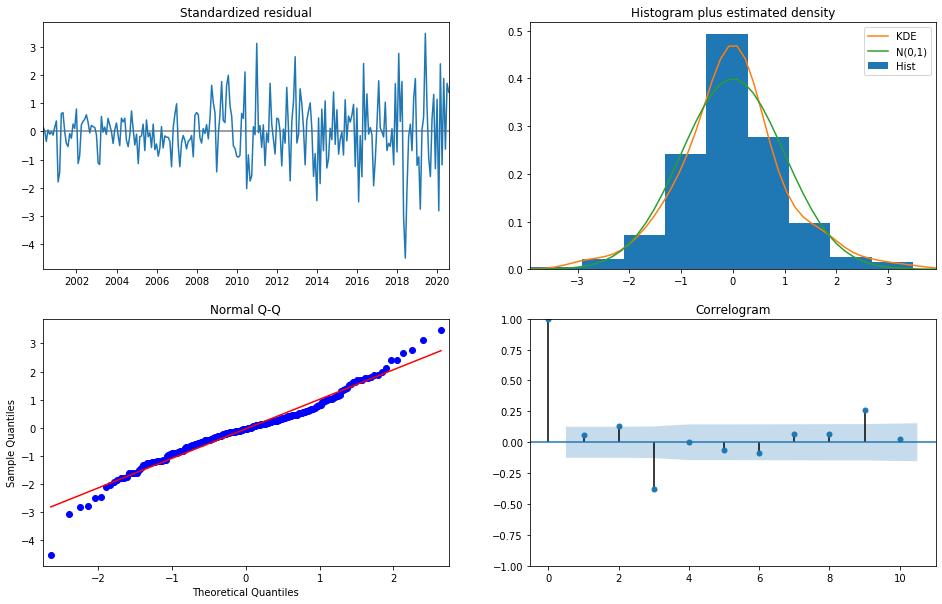

In [122]:
output_weho = sarimax(WeHo)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  295
Model:             SARIMAX(1, 2, 1)x(2, 2, 1, 12)   Log Likelihood               -2368.938
Date:                            Sun, 20 Sep 2020   AIC                           4749.876
Time:                                    18:30:00   BIC                           4770.859
Sample:                                01-31-1996   HQIC                          4758.326
                                     - 07-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4270      0.053      7.984      0.000       0.322       0.532
ma.L1         -1.5187      0.052   

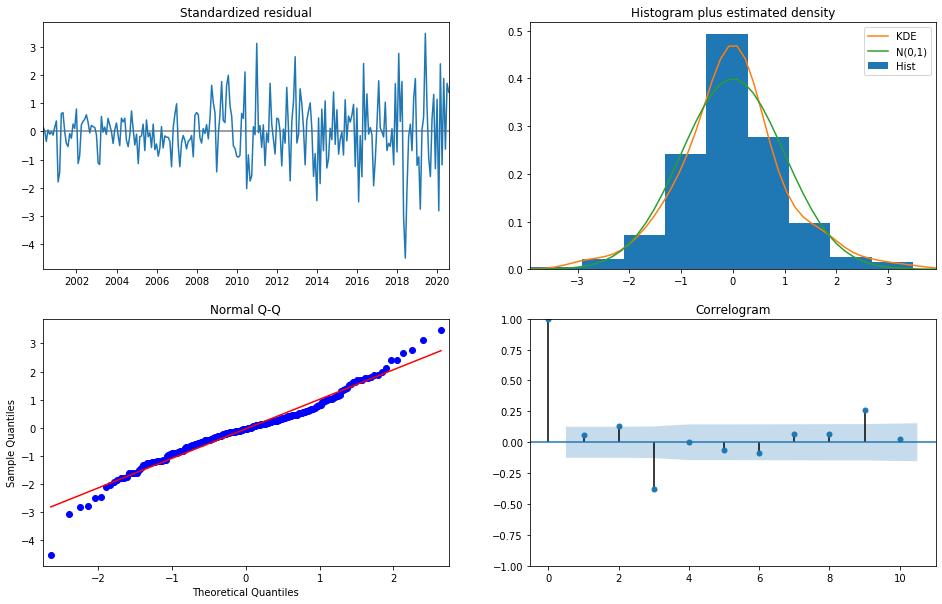

In [118]:
sarimax(CentCity)

In [90]:
# Plug the optimal parameter values into our SARIMAX model
SARIMAX_WeHo = sm.tsa.statespace.SARIMAX(WeHo, 
                                        order=(1, 2, 1), 
                                        seasonal_order=(0, 0, 0, 12), 
                                        enforce_stationarity=True, 
                                        enforce_invertibility=False,
                                        freq='M')

# Fit the model and print results
output = SARIMAX_WeHo.fit()

print(output.summary())

                           Statespace Model Results                           
Dep. Variable:                  value   No. Observations:                  295
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -2758.003
Date:                Sun, 20 Sep 2020   AIC                           5522.006
Time:                        17:33:33   BIC                           5533.046
Sample:                    01-31-1996   HQIC                          5526.427
                         - 07-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8529      0.039     21.941      0.000       0.777       0.929
ma.L1         -0.9549      0.022    -43.538      0.000      -0.998      -0.912
sigma2      7.267e+06   3.15e+05     23.084      0.0

All coefficients are significant. This is good. Let's take a look at the diagnostics.

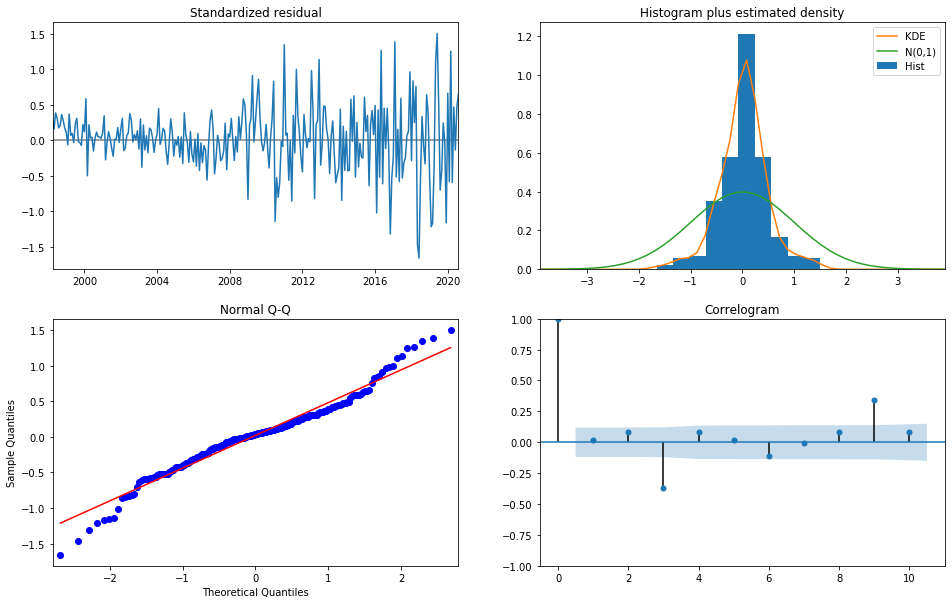

In [84]:
output.plot_diagnostics(figsize=(16,10));

The data and residuals look normally distributed, which is good. We can see from the correlogram that there appears to be some seasonality around 3 months and 9 months. We do know there is seasonality in real estate as previously discussed. 

The model is optimized to account for seasonality while minimizing BIC, so we'll keep it as is.

In [ ]:
# Plug the optimal parameter values into a new SARIMAX model
SARIMAX_WeHo = sm.tsa.statespace.SARIMAX(WeHo, 
                                        order=(0, 2, 1), 
                                        seasonal_order=(1, 1, 2, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False,
                                        freq='M')

# Fit the model and print results
output = SARIMAX_WeHo.fit()

print(output.summary())

In [ ]:
output.plot_diagnostics(figsize=(16,10));

In [ ]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2018-12-31'), dynamic=False)
pred_conf = pred.conf_int()

In [ ]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 8

# Plot observed values
ax = WeHo['2018-12':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Sale Prices (USD)')
plt.legend()

plt.show()

## Calculate RMSE for West Hollywood

In [ ]:
from sklearn.metrics import mean_squared_error
import math 

# Get the real and predicted values
WeHo_predicted = pred.predicted_mean
WeHo_real = WeHo['2018-12-31':].value
mse = mean_squared_error(WeHo_real, WeHo_predicted)
rmse = np.sqrt(mse)

# Compute the mean square error
print('The RMSE of our forecasts is {}'.format(round(rmse, 2)))

In [ ]:
# Compute the mean square error
mse = ((WeHo_real - WeHo_predicted) ** 2).mean()
rmse = np.sqrt(mse)
print('The RMSE of our forecasts is {}'.format(round(rmse, 2)))

In [ ]:
e = []
for i,j in zip(WeHo_real,WeHo_predicted):
    e.append((i-j)**2)

mse = sum(e)/len(e)
rmse = np.sqrt(mse).round(2)
rmse

In [ ]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2018-12-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

In [ ]:
# Plot the dynamic forecast with confidence intervals.

ax = WeHo['2013':].plot(label='observed', figsize=(16, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-12-31'), WeHo_predicted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Sale Prices (USD)')

plt.legend()
plt.show()

# Calculate 5 & 10 Year ROI

Since we are focusing on buy and hold, we're going to see which zip codes return the highest ROI for 5 & 10 years. A note is that we will also want to look at the rental market to compare the ratio of median home sale values to median home rental values as the rent to mortage ratio will play a roll in returns. I will put that in our future work. 

In [44]:
# function to calculate ROI ((profit/investment)*100) for 5 & 10 years
def calculate_ROI(ts):
    
    '''
    Input time series and calculate ROI for 5 & 10 year investments.
    Returns relevant time series with ROI as value. 
    
    '''
    # Calculate ROI ((current value - investment)/investment)*100
    
    roi_5yr = (ts - ts.shift(periods=60))/ts.shift(periods=60)*100
    roi_10yr = (ts - ts.shift(periods=120))/ts.shift(periods=120)*100
    
    roi_5yr.dropna(inplace=True)
    roi_10yr.dropna(inplace=True)
    
    # Return new time series
    
    return roi_5yr, roi_10yr

In [ ]:
weho_roi_5yr, weho_roi_10yr = calculate_ROI(WeHo)

Plot 5 & 10 Year ROI. 

In [ ]:
# create visualization of  time series:
plt.figure(figsize=(18,6))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.plot(weho_roi_5yr, label='5 Year ROI', color='magenta')
ax.plot(weho_roi_10yr, label='10 Year ROI', color='blue')
ax.fill_between(weho_roi_5yr.index, weho_roi_5yr.value < 0, - 20, color='red', alpha=.2)
plt.title('5 & 10 Year ROI for Homes in West Hollywood', fontsize=16)
ax.set_ylabel('ROI')
ax.set_xlabel('Year')
plt.yticks([-25,0,25,50,75,100,125,150,175,200,225,250,275], [str(x) + "%" for x in [-25,0,25,50,75,100,125,150,175,200,225,250,275]], fontsize=10)
ax.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", alpha=0.3)
ax.legend()
plt.show();

In [ ]:
# Get forecast and confidence interval for steps ahead in future
future = output.get_forecast(steps=60, dynamic=True)
future_conf = future.conf_int(steps=60)

# plot results
ax = WeHo['1996':].plot(label='Observed', figsize=(12, 6))
future.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(future_conf.index,
                future_conf.iloc[:, 0],
                future_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Sale Value (USD)')
ax.legend()
plt.show()

# show prediction for end of step-period (in this case in 5 years future time)
forecast = future.predicted_mean[-1]
maximum = future_conf.iloc[-1,1]
minimum = future_conf.iloc[-1,0]
predictions = {}
predictions['forecast'] = forecast
predictions['maximum'] = maximum
predictions['minimum'] = minimum

In [ ]:
# Get forecast and confidence interval for steps ahead in future
future = output.get_forecast(steps=120, dynamic=True)
future_conf = future.conf_int(steps=120)

# plot results
ax = WeHo['1996':].plot(label='Observed', figsize=(12, 6))
future.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(future_conf.index,
                future_conf.iloc[:, 0],
                future_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Sale Value (USD)')
ax.legend()
plt.show()

# show prediction for end of step-period (in this case in 5 years future time)
forecast = future.predicted_mean[-1]
maximum = future_conf.iloc[-1,1]
minimum = future_conf.iloc[-1,0]
predictions = {}
predictions['forecast'] = forecast
predictions['maximum'] = maximum
predictions['minimum'] = minimum

Turn this into function with steps as input. 

Run for all 95 zip codes and create a list of:
- predicted mean
- 95% confidence interval (lower)
- 95% confidence interval (upper)

Sort by predicted mean

In [ ]:

def projections(zipcodes,ts,years):
    '''
    
    '''
    
    # Define steps for forecasting
    steps = years*12
    
    # Create list to append projection metrics
    projections = []
    
    # Iterate through time series of each zip code
    for zipcode in zipcodes:
        
        # Time series of zip code
        ts_zipcode = ts[ts['RegionName'] == zipcode]   
        
        # Set index to time
        ts_zipcode.index = ts_zipcode['time']
        
        
        to_drop = ['RegionName','City','State','Metro','CountyName','time']
        ts_zipcode = ts_zipcode.drop(to_drop, axis=1)

        # Plug the optimal parameter values into a new SARIMAX model
        # I used the values from the lowest RMSE
        SARIMAX_zipcode = sm.tsa.statespace.SARIMAX(ts_zipcode,
                                                    order=(0, 2, 1),
                                                    seasonal_order=(1, 1, 2, 12),
                                                    enforce_stationarity=False,
                                                    enforce_invertibility=False,
                                                    freq='M')

        # Fit the model and print results
        model_zipcode = SARIMAX_zipcode.fit()
    
        # Get forecast and confidence interval for steps ahead in future
        forecast_zipcode = model_zipcode.get_forecast(steps=steps, dynamic=True)
        conf_int_zipcode = forecast_zipcode.conf_int(steps=steps)

        # show prediction for end of step-period (in this case in 10 years future time)
        pred_mean = forecast_zipcode.predicted_mean[-1]
        conf_int_min = conf_int_zipcode.iloc[-1,0]
        conf_int_max = conf_int_zipcode.iloc[-1,1]
        
        # Last value of the time series - this will be used to calculate projected ROI
        invest_val = ts_zipcode['value'][-1]
        
        # ROI (Return on Investment) as Percentage
        ROI = (pred_mean-invest_val)/invest_val *100
        
        # Profit
        profit = pred_mean-invest_val
        
        # Create DataFrame with relevant data
        predicted = {}
        predicted['zipcode'] = zipcode
        predicted['predicted mean'] = pred_mean
        predicted['conf int min'] = conf_int_min
        predicted['conf int max'] = conf_int_max
        predicted['investment value'] = invest_val
        predicted['profit'] = profit
        predicted['ROI'] = ROI

        
        projections.append(predicted)
        
    return pd.DataFrame.from_dict(projections)

In [ ]:
# Get 5 year projections for all LA zip codes
projections_5yr = projections(zipcodes, df_LA_melt_sort, 5)

## Sort Top 10 Zip Codes

Sort top 10 zip codes by relevant metrics.

In [ ]:
### Sort top 10 ###

def top_zipcodes(df, by=['ROI'], top=10):
    '''
    Input projections dataframe.
    Returns top zip codes ranked by input metric.
    
    df : dataframe of calculated projections from projections function.
    by : metric to sort by.
    top : n number of zip codes to return.
    
    '''
    top_zipcodes = df.sort_values(by=by, axis=0, ascending=False)[0:top-1]
    return top_zipcodes

# by top value
top_10_value = top_zipcodes(projections_5yr, by=['predicted mean'])

# by highest profit
top_10_profit = top_zipcodes(projections_5yr, by=['profit'])

# by highest ROI
top_10_roi = top_zipcodes(projections_5yr)

In [ ]:
top_10_roi

In [ ]:

def plot_top_zipcodes(df, metric='ROI'):
    '''
    '''
    
    # Get errors; (pred mean - lower bound of conf interval)
    errors = df[metric] - df['conf int min']
    
    # Append errors column to dataframe
    df['errors'] = errors

    ### Plot Predicted Mean Home Sale Values ###

    # x-labels
    variables = list(df.zipcode.values)
    
    # Add variables column to dataframe
    df['variables'] = variables
    
    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("paper")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(15, 5))
    
    if metric == 'ROI':
        
        # Error bars for 95% confidence interval
        df.plot(x='variables', 
                y=metric, 
                kind='bar',
                ax=ax, 
                color='none', 
                #fontsize=22,
                ecolor='none', 
                legend=False)
        
        # Set title & labels
        plt.title(f'{metric.upper()} - 5 Year')#, fontsize=30)
        ax.set_ylabel(f'{metric.upper()} (%)')#, fontsize=22)               
        
    else:
        
        # Error bars for 95% confidence interval
        df.plot(x='variables', 
                y=metric, 
                kind='bar',
                ax=ax, 
                color='none', 
                #fontsize=22,
                ecolor='black',
                capsize=3,
                yerr='errors', 
                legend=False)
        
        plt.title(f'{metric.title()} - 5 Year - w/ 95% Confidence Intervals')#, fontsize=30)
        ax.set_ylabel(f'{metric.title()} (USD)')#, fontsize=22)     
    
    ax.set_xlabel('Zip Code')#,fontsize=22)
    
    # Predicted Mean Homesale Value
    ax.scatter(x=pd.np.arange(df.shape[0]),
               marker='s', 
               s=20, 
               y=df[metric], 
               color='black')
    
    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    
    return plt.show()


In [ ]:
plot_top_zipcodes(top_10_roi, metric='profit')

In [ ]:
plot_top_zipcodes(top_10_roi)

In [ ]:
#     # plot results
#     ax = WeHo['1996':].plot(label='Observed', figsize=(12, 6))
#     future.predicted_mean.plot(ax=ax, label='Forecast')
#     ax.fill_between(future_conf.index,
#                     future_conf.iloc[:, 0],
#                     future_conf.iloc[:, 1], color='k', alpha=.25)
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Median Home Sale Value (USD)')
#     ax.legend()
#     plt.show()

# Step 6: Interpreting Results